In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's a semicolon-separated CSV file)
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')

# Data Integrity Checks 
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


In [2]:
# Verify data types and convert categorical variables
categorical_cols = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 
                    'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nData Types After Conversion:")
print(df.dtypes)

# Univariate Analysis
# Summary statistics for key numerical variables
print("\nSummary Statistics for Absenteeism Time in Hours:")
print(df['Absenteeism time in hours'].describe())
print("\nSummary Statistics for Age:")
print(df['Age'].describe())
print("\nSummary Statistics for Service Time:")
print(df['Service time'].describe())




Data Types After Conversion:
ID                                    int64
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense                int64
Distance from Residence to Work       int64
Service time                          int64
Age                                   int64
Work load Average/day               float64
Hit target                            int64
Disciplinary failure               category
Education                          category
Son                                   int64
Social drinker                     category
Social smoker                      category
Pet                                   int64
Weight                                int64
Height                                int64
Body mass index                       int64
Absenteeism time in hours             int64
dtype: object

Summary Statistics for Absentee

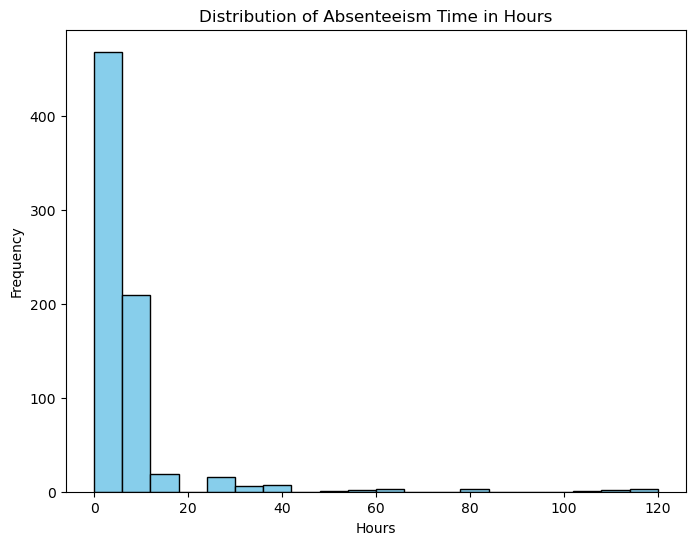

In [3]:
# Histogram of Absenteeism Time to understand its distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Absenteeism time in hours'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Absenteeism Time in Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()



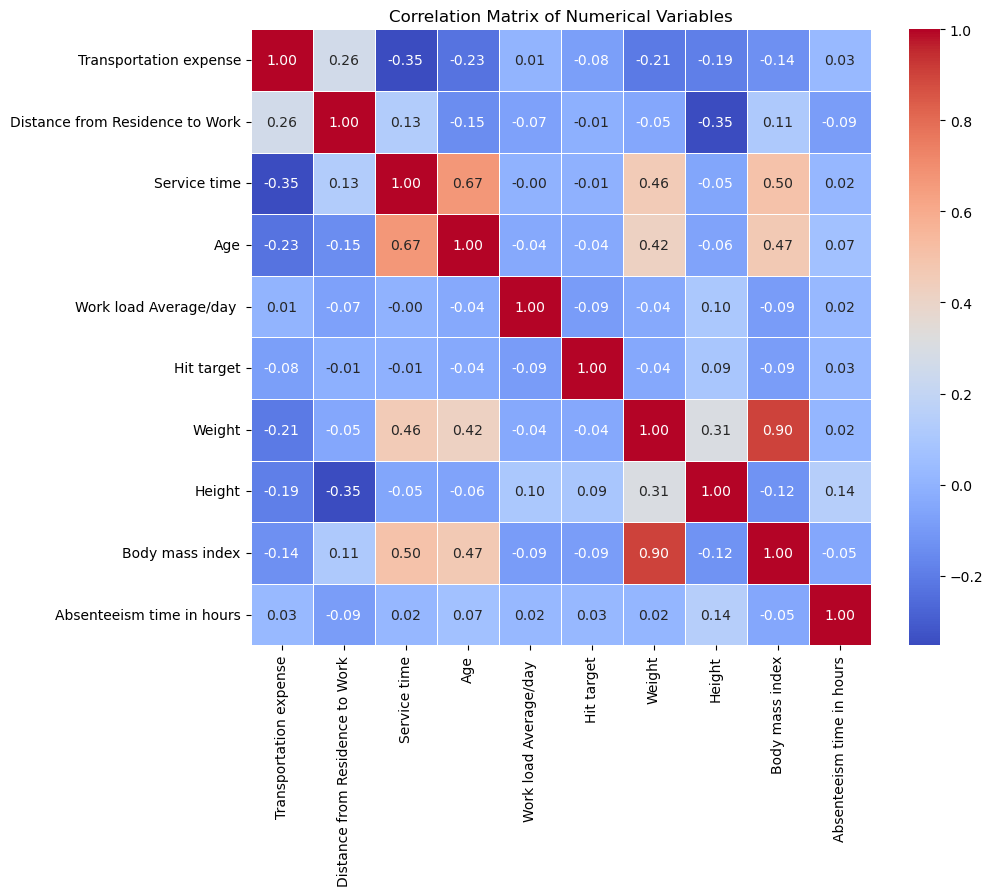

In [4]:
# Bivariate Analysis 
# Correlation matrix for numerical variables
numerical_cols = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 
                 'Age', 'Work load Average/day ', 'Hit target', 'Weight', 'Height', 
                 'Body mass index', 'Absenteeism time in hours']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()




Mean Absenteeism Time by Season:
Seasons
1    7.300000
2    6.000000
3    8.153005
4    6.353846
Name: Absenteeism time in hours, dtype: float64


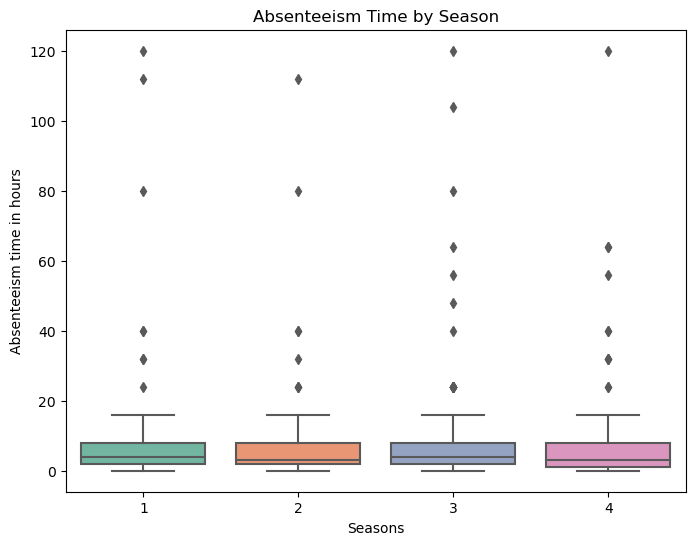

In [5]:
#  Categorical Variable Analysis 
# Mean absenteeism time by Seasons
print("\nMean Absenteeism Time by Season:")
print(df.groupby('Seasons')['Absenteeism time in hours'].mean())

# Boxplot of Absenteeism Time by Seasons
plt.figure(figsize=(8, 6))
sns.boxplot(x='Seasons', y='Absenteeism time in hours', data=df, palette='Set2')
plt.title('Absenteeism Time by Season')
plt.show()




Mean Absenteeism Time by Day of the Week:
Day of the week
2    9.248447
3    7.980519
4    7.147436
5    4.424000
6    5.125000
Name: Absenteeism time in hours, dtype: float64


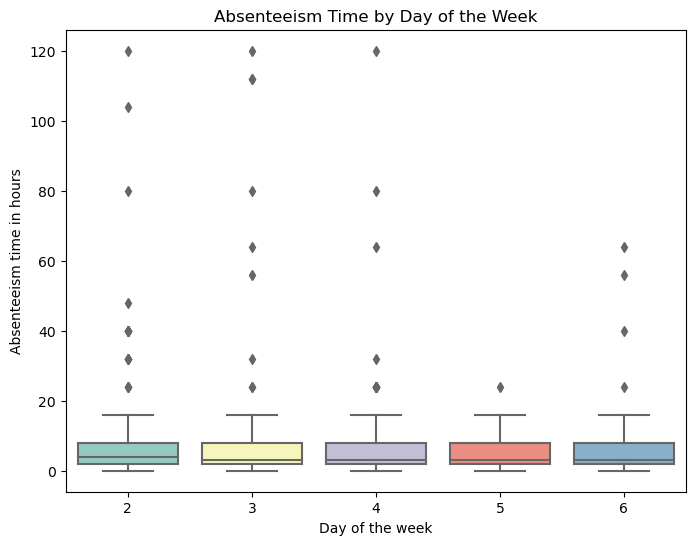

In [7]:
 #Mean absenteeism time by Day of the week
print("\nMean Absenteeism Time by Day of the Week:")
print(df.groupby('Day of the week')['Absenteeism time in hours'].mean())

# Boxplot of Absenteeism Time by Day of the Week
plt.figure(figsize=(8, 6))
sns.boxplot(x='Day of the week', y='Absenteeism time in hours', data=df, palette='Set3')
plt.title('Absenteeism Time by Day of the Week')
plt.show()




Mean Absenteeism Time by ICD vs Non-ICD:
Is_ICD
False     3.307531
True     13.522901
Name: Absenteeism time in hours, dtype: float64


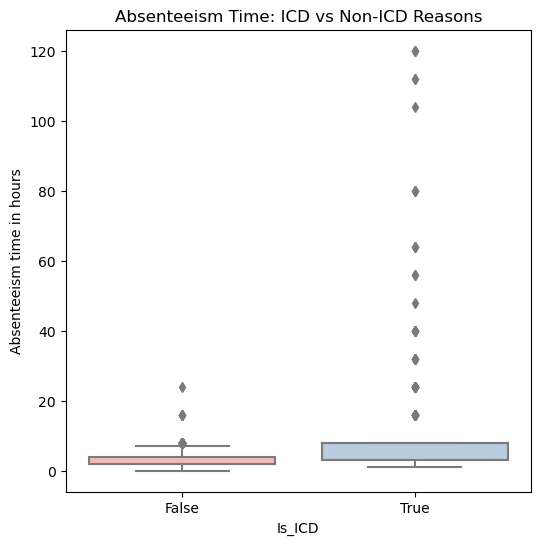


Frequency of Reasons for Absence:
Reason for absence
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
12      8
6       8
8       6
21      6
9       4
24      3
5       3
16      3
15      2
4       2
3       1
17      1
2       1
Name: count, dtype: int64


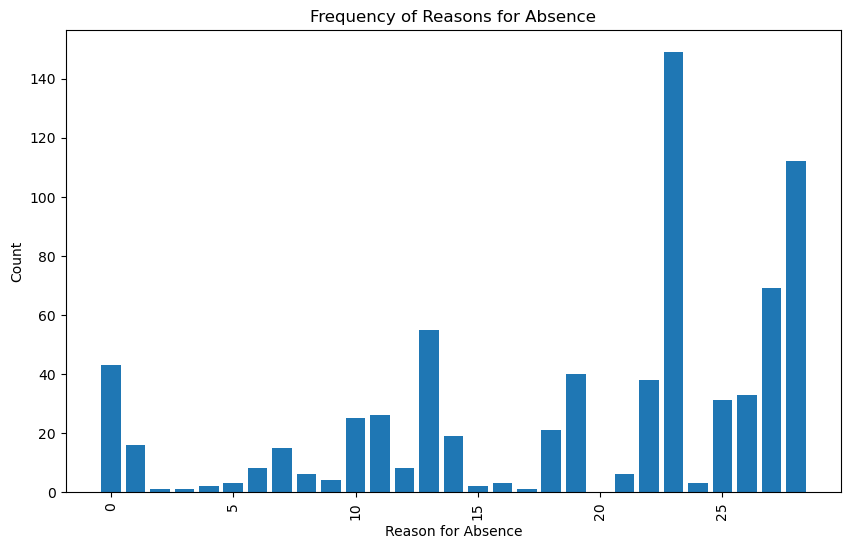

In [14]:
# Health-Related Trends 
# Create a column to distinguish ICD (1-21) vs Non-ICD (0, 22-28) reasons

df['Is_ICD'] = df['Reason for absence'].astype(int).between(1, 21)

print("\nMean Absenteeism Time by ICD vs Non-ICD:")
print(df.groupby('Is_ICD')['Absenteeism time in hours'].mean())

# Boxplot for ICD vs Non-ICD
plt.figure(figsize=(6, 6))
sns.boxplot(x='Is_ICD', y='Absenteeism time in hours', data=df, palette='Pastel1')
plt.title('Absenteeism Time: ICD vs Non-ICD Reasons')
plt.show()

# Frequency of each Reason for absence
print("\nFrequency of Reasons for Absence:")
print(df['Reason for absence'].value_counts())

reason_counts = df['Reason for absence'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(reason_counts.index, reason_counts.values) 
plt.title("Frequency of Reasons for Absence")
plt.xlabel("Reason for Absence")
plt.ylabel("Count")
plt.xticks(rotation=90) 
plt.show()



Mean Absenteeism Time by Education:
Education
1    7.189853
2    6.391304
3    5.265823
4    5.250000
Name: Absenteeism time in hours, dtype: float64

Mean Absenteeism Time by Number of Children:
Son
0     5.385906
1     6.030568
2    10.570513
3    12.200000
4     7.285714
Name: Absenteeism time in hours, dtype: float64


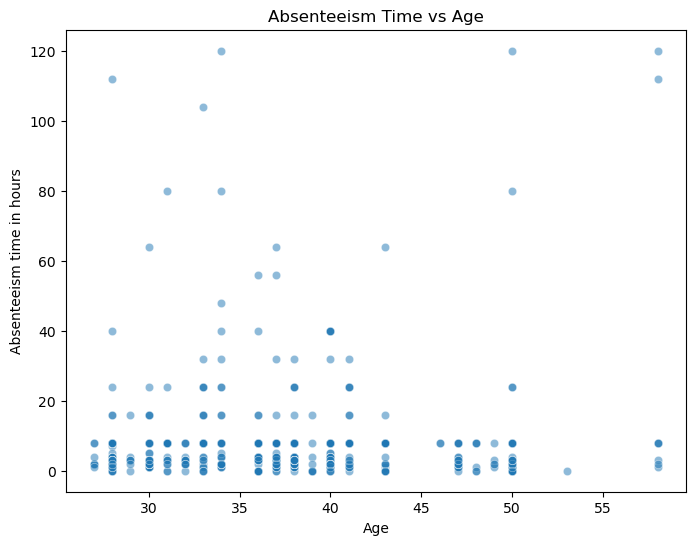

In [19]:
# Demographic Factors
# Mean absenteeism time by Education level
print("\nMean Absenteeism Time by Education:")
print(df.groupby('Education')['Absenteeism time in hours'].mean())

# Mean absenteeism time by Number of Children (Son)
print("\nMean Absenteeism Time by Number of Children:")
print(df.groupby('Son')['Absenteeism time in hours'].mean())

# Scatter plot of Age vs Absenteeism Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Absenteeism time in hours', data=df, alpha=0.5)
plt.title('Absenteeism Time vs Age')
plt.show()


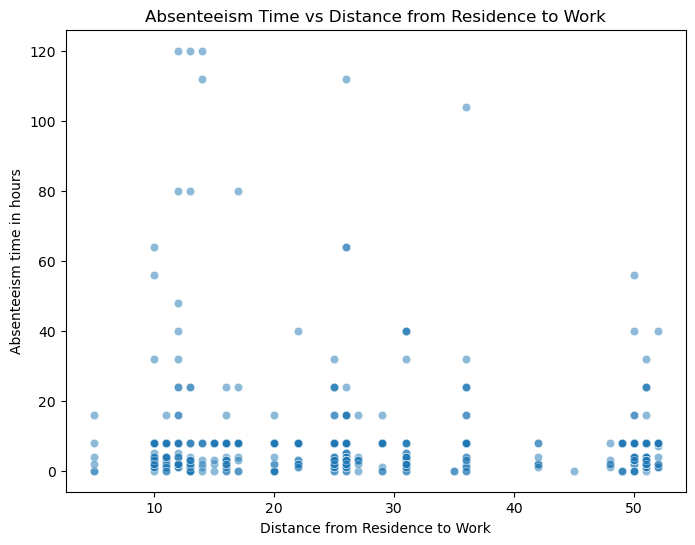

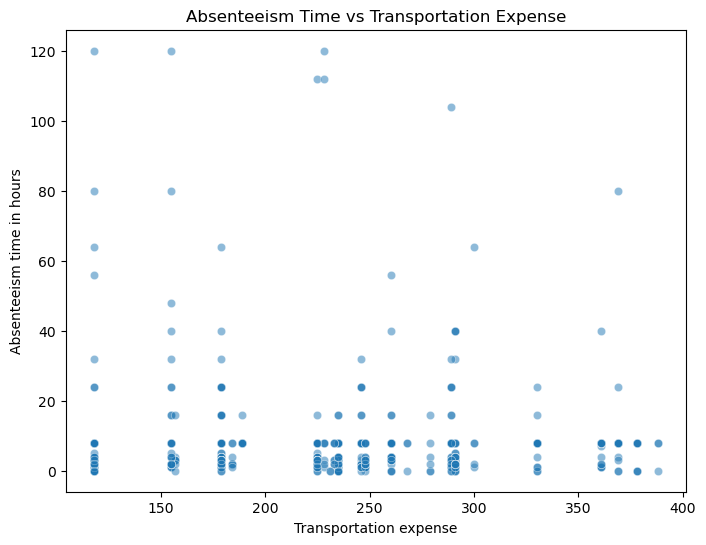

In [20]:
# Environmental Factors 
# Scatter plot of Distance from Residence to Work vs Absenteeism Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance from Residence to Work', y='Absenteeism time in hours', data=df, alpha=0.5)
plt.title('Absenteeism Time vs Distance from Residence to Work')
plt.show()

# Scatter plot of Transportation Expense vs Absenteeism Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Transportation expense', y='Absenteeism time in hours', data=df, alpha=0.5)
plt.title('Absenteeism Time vs Transportation Expense')
plt.show()